<h1 align= 'center'> Bird Classification </h1>

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Display all the columns/rows of the DataFrame.
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing all the Classes
Class0 = pd.read_csv('Extracted Features\Class0.csv')
Class1 = pd.read_csv('Extracted Features\Class1.csv')
Class2 = pd.read_csv('Extracted Features\Class2.csv')
Class3 = pd.read_csv('Extracted Features\Class3.csv')
Class4 = pd.read_csv('Extracted Features\Class4.csv')
Class5 = pd.read_csv('Extracted Features\Class5.csv')
Class6 = pd.read_csv('Extracted Features\Class6.csv')
Class7 = pd.read_csv('Extracted Features\Class7.csv')
Class8 = pd.read_csv('Extracted Features\Class8.csv')

In [3]:
## Adding Class Column (Target)
Class0['Class'] = 0
Class1['Class'] = 1
Class2['Class'] = 2
Class3['Class'] = 3
Class4['Class'] = 4
Class5['Class'] = 5
Class6['Class'] = 6
Class7['Class'] = 7
Class8['Class'] = 8

In [4]:
## Concatenating the DataFrames
frames = [Class0, Class1, Class2, Class3, Class4, Class5, Class6, Class7, Class8]
df = pd.concat(frames)
df.tail()

,RedMean,RedMedian,GreenMean,GreenMedian,BlueMean,BlueMedian,Mean,Median,Maximum,Minimum,Std_Dev,Kurtosis,Skewness,IQR,Entropy,FFT_Mean,FFT_Median,FFT_Maximum,FFT_Minimum,Wave_Mean,Wave_Median,Wave_Maximum,Wave_Minimum,DCT,Class
131,94,75,86,76,53,42,85,72,245,0,16,3,1,58,0,84,0,255,0,3,2,8,0,255,8
132,116,133,133,155,48,36,118,135,236,4,18,2,0,79,0,137,206,255,0,4,4,8,0,255,8
133,95,79,93,81,34,30,87,75,247,0,20,3,1,60,0,58,21,255,0,3,3,8,0,255,8
134,117,110,130,128,108,99,124,119,255,8,17,2,0,89,0,255,78,255,0,4,3,8,1,255,8
135,86,74,108,120,72,65,97,103,254,1,16,2,0,109,0,46,0,255,0,3,2,8,0,255,8


In [5]:
## Understanding the New Data
print('Dimensionality od the Dataset is: ',df.shape)

Dimensionality od the Dataset is:  (1086, 25)


In [6]:
df.reset_index(inplace= True)       ## Reseting the index
df.drop(columns= 'index', inplace= True)        ## Dropping the index column
df.tail()

,RedMean,RedMedian,GreenMean,GreenMedian,BlueMean,BlueMedian,Mean,Median,Maximum,Minimum,Std_Dev,Kurtosis,Skewness,IQR,Entropy,FFT_Mean,FFT_Median,FFT_Maximum,FFT_Minimum,Wave_Mean,Wave_Median,Wave_Maximum,Wave_Minimum,DCT,Class
1081,94,75,86,76,53,42,85,72,245,0,16,3,1,58,0,84,0,255,0,3,2,8,0,255,8
1082,116,133,133,155,48,36,118,135,236,4,18,2,0,79,0,137,206,255,0,4,4,8,0,255,8
1083,95,79,93,81,34,30,87,75,247,0,20,3,1,60,0,58,21,255,0,3,3,8,0,255,8
1084,117,110,130,128,108,99,124,119,255,8,17,2,0,89,0,255,78,255,0,4,3,8,1,255,8
1085,86,74,108,120,72,65,97,103,254,1,16,2,0,109,0,46,0,255,0,3,2,8,0,255,8


## Basic Feature Engineering

In [7]:
df.columns

Index(['RedMean', 'RedMedian', 'GreenMean', 'GreenMedian', 'BlueMean',
       'BlueMedian', 'Mean', 'Median', 'Maximum', 'Minimum', 'Std_Dev',
       'Kurtosis', 'Skewness', 'IQR', 'Entropy', 'FFT_Mean', 'FFT_Median',
       'FFT_Maximum', 'FFT_Minimum', 'Wave_Mean', 'Wave_Median',
       'Wave_Maximum', 'Wave_Minimum', 'DCT', 'Class'],
      dtype='object')

In [8]:
df.describe()

,RedMean,RedMedian,GreenMean,GreenMedian,BlueMean,BlueMedian,Mean,Median,Maximum,Minimum,Std_Dev,Kurtosis,Skewness,IQR,Entropy,FFT_Mean,FFT_Median,FFT_Maximum,FFT_Minimum,Wave_Mean,Wave_Median,Wave_Maximum,Wave_Minimum,DCT,Class
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.0,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.0,1086.000000
mean,118.372007,116.235727,115.023941,116.234807,85.218232,79.693370,112.631676,112.720074,245.959484,4.073665,12.244015,2.893186,0.307551,76.709024,0.007366,110.667587,83.891344,255.0,0.348987,3.719153,3.639963,7.779006,0.255064,255.0,3.753223
std,28.678445,41.489787,28.586249,40.187385,36.465441,50.819142,27.218973,38.311684,13.165176,6.394850,4.988497,1.445670,0.500026,36.611550,0.085551,60.057829,102.842940,0.0,1.079654,0.962591,1.303743,0.497886,0.452690,0.0,2.667757
min,35.000000,8.000000,30.000000,10.000000,13.000000,2.000000,40.000000,10.000000,153.000000,0.000000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,255.0,0.000000,1.000000,0.000000,5.000000,0.000000,255.0,0.000000
25%,99.000000,88.000000,96.000000,89.000000,59.000000,42.250000,94.000000,88.000000,241.250000,0.000000,9.000000,2.000000,0.000000,51.000000,0.000000,65.250000,0.000000,255.0,0.000000,3.000000,3.000000,8.000000,0.000000,255.0,1.000000
50%,116.000000,113.000000,115.000000,115.000000,80.500000,68.000000,112.000000,110.000000,252.000000,1.000000,11.000000,3.000000,0.000000,71.000000,0.000000,107.000000,0.000000,255.0,0.000000,4.000000,4.000000,8.000000,0.000000,255.0,4.000000
75%,137.000000,144.750000,133.000000,140.750000,106.000000,105.000000,129.000000,134.750000,255.000000,5.000000,15.000000,3.000000,1.000000,98.000000,0.000000,149.000000,179.000000,255.0,0.000000,4.000000,4.000000,8.000000,0.000000,255.0,6.000000
max,247.000000,255.000000,245.000000,255.000000,239.000000,255.000000,245.000000,255.000000,255.000000,50.000000,33.000000,23.000000,2.000000,236.000000,1.000000,255.000000,255.000000,255.0,23.000000,8.000000,8.000000,8.000000,2.000000,255.0,8.000000


In [9]:
## Checking for Missing Values.
df.isnull().any()

RedMean         False
RedMedian       False
GreenMean       False
GreenMedian     False
BlueMean        False
BlueMedian      False
Mean            False
Median          False
Maximum         False
Minimum         False
Std_Dev         False
Kurtosis        False
Skewness        False
IQR             False
Entropy         False
FFT_Mean        False
FFT_Median      False
FFT_Maximum     False
FFT_Minimum     False
Wave_Mean       False
Wave_Median     False
Wave_Maximum    False
Wave_Minimum    False
DCT             False
Class           False
dtype: bool

In [10]:
X = df.drop(columns= 'Class')
y = df.Class

In [11]:
## Checking for Correlation
### Removing highly correlated Features. (With respect to the Independent Features)

threshold = 0.8

# Finding and Removing Correlated Features (Krish Naik).
def correlation(dataset, threshold):
    col_corr = set() ## Set of all the names of the Correlated Columns.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in the Absolute Coefficient value.
                colname = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(colname)
    return col_corr

correlation(X, threshold)

{'BlueMedian',
 'GreenMedian',
 'Mean',
 'Median',
 'RedMedian',
 'Wave_Mean',
 'Wave_Median'}

In [12]:
# Removing the Highly-Correlated Columns 
X.drop(columns= ['BlueMedian', 'GreenMedian', 'Mean', 'Median', 'RedMedian', 'Wave_Mean', 'Wave_Median'], inplace= True)

In [13]:
X.head()

,RedMean,GreenMean,BlueMean,Maximum,Minimum,Std_Dev,Kurtosis,Skewness,IQR,Entropy,FFT_Mean,FFT_Median,FFT_Maximum,FFT_Minimum,Wave_Maximum,Wave_Minimum,DCT
0,170,147,106,251,0,20,4,0,43,0,215,0,255,0,8,0,255
1,129,124,61,255,0,7,4,1,41,0,74,192,255,0,8,1,255
2,131,132,94,254,1,11,4,0,46,0,97,157,255,0,8,0,255
3,148,136,69,255,0,14,2,0,100,0,175,191,255,0,8,0,255
4,134,133,71,255,0,9,3,0,52,0,140,0,255,0,8,0,255


### Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 45)

In [15]:
columns = ['RedMean', 'GreenMean', 'BlueMean', 'Maximum', 'Minimum', 'Std_Dev', 'Kurtosis', 'Skewness', 'IQR', 'Entropy', 'FFT_Mean', 
'FFT_Median', 'FFT_Maximum', 'FFT_Minimum', 'Wave_Maximum', 'Wave_Minimum', 'DCT']

In [16]:
from sklearn.preprocessing import MinMaxScaler

## Fitting on train Data
scaler = MinMaxScaler().fit(X_train)

## Transform the Train and Test Data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns= columns) 
X_test = pd.DataFrame(X_test, columns= columns) 

In [18]:
X_train.head()

,RedMean,GreenMean,BlueMean,Maximum,Minimum,Std_Dev,Kurtosis,Skewness,IQR,Entropy,FFT_Mean,FFT_Median,FFT_Maximum,FFT_Minimum,Wave_Maximum,Wave_Minimum,DCT
0,0.391509,0.330233,0.101770,0.961039,0.14,0.233333,0.090909,0.0,0.214592,0.0,0.266667,0.576471,0.0,0.000000,1.0,0.5,0.0
1,0.485849,0.446512,0.141593,0.935065,0.08,0.200000,0.136364,0.0,0.133047,0.0,0.552941,0.549020,0.0,0.000000,1.0,0.5,0.0
2,0.528302,0.590698,0.579646,1.000000,0.00,0.666667,0.045455,0.0,0.476395,0.0,0.333333,1.000000,0.0,0.000000,1.0,0.0,0.0
3,0.481132,0.562791,0.526549,0.896104,0.12,0.200000,0.045455,0.0,0.313305,0.0,0.521569,0.000000,0.0,0.000000,1.0,0.5,0.0
4,0.462264,0.413953,0.500000,0.922078,0.02,0.300000,0.045455,0.0,0.489270,0.0,0.741176,1.000000,0.0,0.111111,1.0,0.0,0.0


In [19]:
X_train.shape

(868, 17)

### Feature Selection

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [21]:
print(model.feature_importances_)

[0.09435469 0.10628302 0.10315626 0.07462296 0.06608636 0.09833237
 0.05854402 0.02742461 0.10313518 0.00213404 0.09413192 0.0628771
 0.         0.04478416 0.03666041 0.0274729  0.        ]


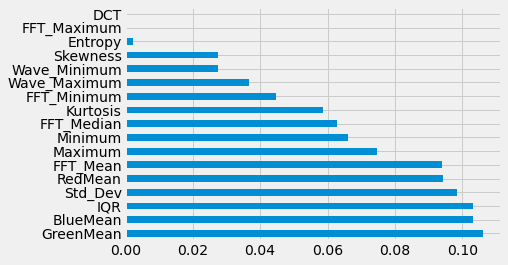

In [22]:
ranked_features = pd.Series(model.feature_importances_, index= X.columns)
ranked_features.nlargest(17).plot(kind= 'barh')
plt.show()

- From here we can see that the "DCT", "FFT_Maximum" and "Entropy", do not play a major role in determining the Class. So we can remove them.

In [30]:
X_train.drop(columns= ["DCT", "FFT_Maximum", "Entropy"], inplace= True)
X_test.drop(columns= ["DCT", "FFT_Maximum", "Entropy"], inplace= True)

## Model Building

### Initial Analysis of the different Models

In [34]:
## Building a simple Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
classif = LogisticRegression(C = 100, class_weight = 'balanced', multi_class = 'ovr')

classif = classif.fit(X_train, y_train)

In [35]:
## Predicting on train and test data

pred_train = classif.predict(X_train)
pred_test = classif.predict(X_test)

In [36]:
## Classification report for the train data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(pred_train, y_train))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       108
           1       0.66      0.72      0.69       124
           2       0.59      0.63      0.61        95
           3       0.68      0.53      0.59       108
           4       0.49      0.46      0.48        94
           5       0.59      0.64      0.62        70
           6       0.70      0.63      0.66       118
           7       0.33      0.44      0.38        43
           8       0.58      0.59      0.58       108

    accuracy                           0.59       868
   macro avg       0.58      0.58      0.58       868
weighted avg       0.60      0.59      0.59       868



In [37]:
## Classification report for the test data
print(classification_report(pred_test, y_test))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51        21
           1       0.72      0.85      0.78        27
           2       0.61      0.82      0.70        17
           3       0.78      0.47      0.59        38
           4       0.44      0.25      0.32        32
           5       0.44      0.61      0.51        18
           6       0.77      0.70      0.73        33
           7       0.12      0.29      0.17         7
           8       0.72      0.72      0.72        25

    accuracy                           0.59       218
   macro avg       0.56      0.59      0.56       218
weighted avg       0.62      0.59      0.59       218

